In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_excel('final_analysis_data.xlsx')
final_data = pd.read_excel('28-Night-FINAL_DATASET.xlsx')

In [106]:
weighted_hours = pd.read_excel('Weighted_hours.xlsx')

In [72]:
final_employtics = final_data[['hhid', 'PID', 'h2q3', 'age', 'h2q10', 's8q04', 's8q06', 's8q08', 's8q10', 's8q12',
                               'education_levels', 'total_hours', 'hourly_wage', 'monthly_wage', 'numchild', 'gender','lw',
                               'sec_cat', 'h8q19b_twoDigit', 'lmw', 'weight']]
final_employtics = final_employtics.rename(columns={'h2q3': 'sex', 'h2q10': 'marital_status', 's8q04': 'waged_worker', 
                                                's8q06': 'business_owner', 's8q08': 'unpaid_hh_worker','s8q10': 'apprentice', 
                                                's8q12': 'hh_farm_worker','h8q19b_twoDigit': 'ISCO'})

In [73]:
def employ_status(row):
    if row['waged_worker'] ==1 or  row['business_owner'] == 1 or row['apprentice']==1 or row['unpaid_hh_worker']==1:
        return 1
    else:
        return 0

In [74]:
final_employtics['employed'] = final_employtics.apply(lambda row: employ_status(row), axis=1)
final_employtics.shape

(29034, 22)

In [75]:
employed_pips = final_employtics[final_employtics['employed']== 1].copy()
employed_pips['unique_person_id'] = employed_pips['hhid'].astype(str) + '_' + employed_pips['PID'].astype(str)

In [102]:
employed_pips_hrs = employed_pips_hrs[['unique_person_id', 'total_hours', 'sex', 'age', 'hourly_wage', 'monthly_wage', 'proportion']].copy()
employed_pips_hrs

In [94]:
employed_pips_hrs_ = employed_pips_hrs.merge(weighted_hours, left_on='total_hours', right_on='hrs', how='outer')

In [96]:
employed_pips_hrs_

,unique_person_id,total_hours,sex,age,hourly_wage,monthly_wage,hrs,proportion
0,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,5,0.01950
1,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,5,0.01950
2,024dec2ae5e84e15a9d92dc84c3b5084_1.0,5.0,1.0,44.0,NaN,NaN,5,0.01950
3,024dec2ae5e84e15a9d92dc84c3b5084_1.0,5.0,1.0,44.0,NaN,NaN,5,0.01950
4,044116a438c040a898ba43daf6bdc2ea_2.0,5.0,2.0,50.0,NaN,NaN,5,0.01950
...,...,...,...,...,...,...,...,...
5935,de413dde36c14865962c2c14ececa013_1.0,72.0,1.0,45.0,2777.777832,800000.0,72,0.00100
5936,f51ffdd7600f4847883c7bc8f16c9ed7_1.0,72.0,1.0,25.0,NaN,NaN,72,0.00100
5937,f51ffdd7600f4847883c7bc8f16c9ed7_1.0,72.0,1.0,25.0,NaN,NaN,72,0.00100
5938,df1267c3b0e340e8b42781223a0d7f39_1.0,100.0,1.0,46.0,NaN,NaN,100,0.00032


In [104]:
bins= [0,15,25,35,45,55,65, 120]
labels = ['1-14','15-24','25-34','35-44','45-54', '55-64', '65-119']
employed_pips_hrs_['Age_Grouping'] = pd.cut(employed_pips_hrs_['age'], bins=bins, labels=labels, right=False)
employed_pips_hrs_.head(2)

,unique_person_id,total_hours,sex,age,hourly_wage,monthly_wage,hrs,proportion,Age_Grouping
0,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,5,0.0195,15-24
1,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,5,0.0195,15-24


In [108]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [110]:
gender_parting_w = employed_pips_hrs_[['unique_person_id', 'age', 'sex', 'Age_Grouping', 'proportion']].copy()
gwg = gender_parting_w.groupby(['Age_Grouping', 'sex']).apply(weighted_average, 'age', 'proportion')

In [112]:
gwg = gwg.reset_index()
age_gender = gwg.pivot(index='Age_Grouping', columns='sex', values=0)

In [113]:
age_gender = age_gender.reset_index()
age_gender =age_gender.rename(columns={1.0 : 'Men', 2.0: 'Women'})

In [129]:
age_gender['men_perc'] = age_gender['Men']/(age_gender['Men'] + age_gender['Women']) 
age_gender['women_perc'] = age_gender['Women']/(age_gender['Men'] + age_gender['Women']) 
age_gender['gender_gap'] = age_gender['men_perc'] - age_gender['women_perc']

In [130]:
age_gender

sex,Age_Grouping,Men,Women,men_perc,women_perc,gender_gap
0,1-14,12.992180,12.440612,0.510844,0.489156,0.021687
1,15-24,20.124404,20.662800,0.493400,0.506600,-0.013200
2,25-34,29.583202,29.096850,0.504144,0.495856,0.008288
3,35-44,39.401994,39.212026,0.501208,0.498792,0.002416
4,45-54,48.563562,49.168928,0.496903,0.503097,-0.006194
5,55-64,58.597476,59.139862,0.497697,0.502303,-0.004607
6,65-119,71.290353,69.182843,0.507501,0.492499,0.015003


<AxesSubplot:xlabel='Age_Grouping'>

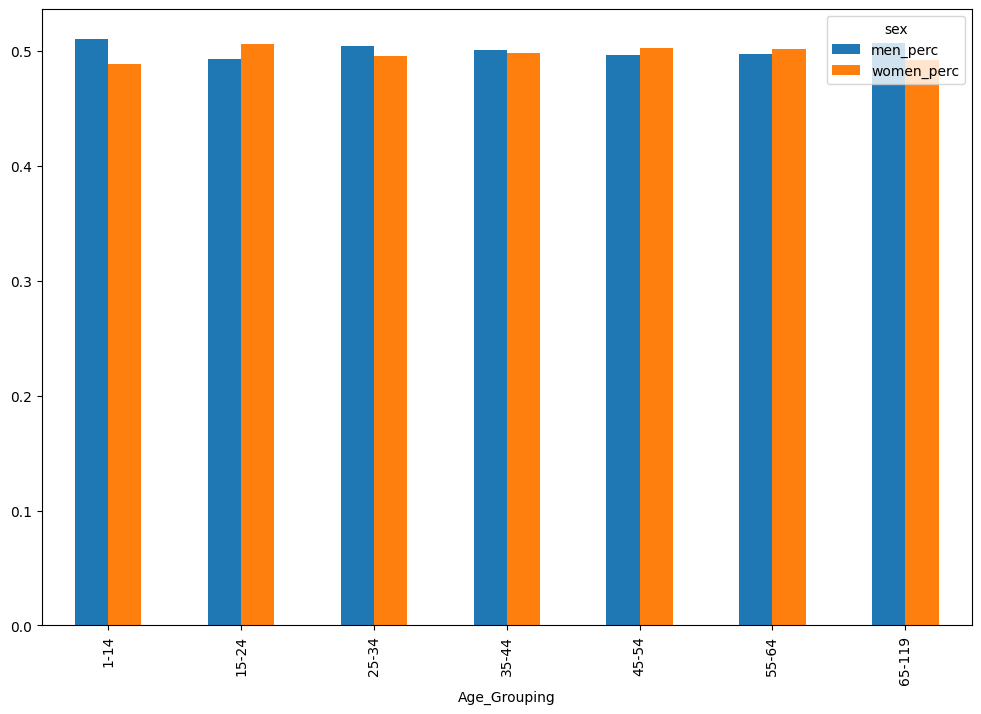

In [132]:
age_gender.plot(x="Age_Grouping", y=["men_perc", "women_perc"], kind="bar", figsize=(12,8))

In [105]:
gender_parting = employed_pips_hrs_[['unique_person_id', 'age', 'sex', 'Age_Grouping']].copy()
gender_parting_age = gender_parting.groupby(['Age_Grouping','sex']).count()[['unique_person_id']]
gender_parting_age

unique_person_id
Age_Grouping sex                  
1-14         1.0                42
             2.0                70
15-24        1.0               804
             2.0               436
25-34        1.0               962
             2.0               662
35-44        1.0               698
             2.0               616
45-54        1.0               548
             2.0               398
55-64        1.0               260
             2.0               196
65-119       1.0               138
             2.0               110

In [17]:
gender_parting_age = gender_parting_age.reset_index()

In [18]:
gender_age = gender_parting_age.pivot(index='Age_Grouping', columns='sex', values='unique_person_id')

In [21]:
gender_age = gender_age.reset_index()
gender_age = gender_age.rename(columns={1.0 : 'Men', 2.0: 'Women'})

In [29]:
gender_age['men_perc'] = gender_age['Men']/(gender_age['Men'] + gender_age['Women']) 
gender_age['women_perc'] = gender_age['Women']/(gender_age['Men'] + gender_age['Women']) 

<AxesSubplot:title={'center':'Working Gender Age_grouping'}, xlabel='Age_Grouping', ylabel='percentage'>

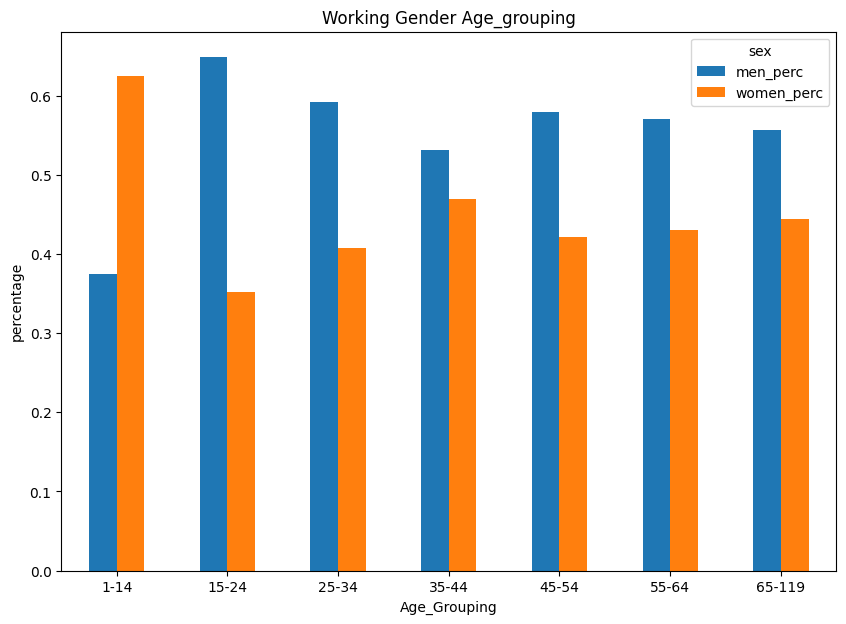

In [137]:
gender_age.plot(x="Age_Grouping", y=["men_perc", "women_perc"], kind="bar", rot=0, figsize=(10,7), ylabel='percentage', title=('Working Gender Age_grouping'))